In [44]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

# Deep Learning

In [45]:
dataset = pd.read_csv("Credit2.csv", sep=";")
dataset

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,good
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,bad
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,good
3,4,<0,existing paid,42,7882,2,4,45,1,2,good
4,5,<0,delayed previously,24,4870,3,4,53,2,2,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,996,no checking,existing paid,12,1736,3,4,31,1,1,good
996,997,<0,existing paid,30,3857,4,4,40,1,1,good
997,998,no checking,existing paid,12,804,4,4,38,1,1,good
998,999,<0,existing paid,45,1845,4,4,23,1,1,bad


In [46]:
dataset.dtypes

ID                         int64
checking_status           object
credit_history            object
duration                   int64
credit_amount              int64
installment_commitment     int64
residence_since            int64
age                        int64
existing_credits           int64
num_dependents             int64
class                     object
dtype: object

In [47]:
for coluna in dataset.columns:
    if dataset[coluna].dtype == 'object':
        tipos = dataset[coluna].unique()
        print(f"\n\nColuna '{coluna}':\nTipos possíveis: {tipos}")



Coluna 'checking_status':
Tipos possíveis: ['<0' '0<=X<200' 'no checking' '>=200']


Coluna 'credit_history':
Tipos possíveis: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']


Coluna 'class':
Tipos possíveis: ['good' 'bad']


# SEPARANDO DADOS X Y

In [48]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X[0])
print(y[0])

['<0' 'critical/other existing credit' 6 1169 4 4 67 2 1]
good


# AJUSTA DADOS CATEGORICOS PARA REDE NEURAL

In [49]:
# label encoder coluna checking_status
# atribui valores de zero a 3
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 0]

array([1, 0, 3, 1, 1, 3, 3, 0, 3, 0, 0, 1, 0, 1, 1, 1, 3, 1, 0, 3, 3, 1,
       1, 0, 3, 1, 3, 2, 0, 1, 0, 1, 0, 3, 2, 0, 3, 2, 2, 0, 3, 0, 0, 1,
       1, 3, 3, 1, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 2, 1, 0, 0, 0, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 1, 0, 1, 1, 1, 0, 3, 0, 3, 3, 3, 1, 1, 3, 0, 0,
       1, 1, 3, 1, 3, 2, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0,
       0, 2, 0, 3, 1, 3, 1, 1, 1, 0, 1, 3, 3, 2, 0, 1, 1, 0, 0, 1, 0, 1,
       3, 3, 3, 3, 3, 0, 0, 2, 2, 0, 1, 1, 3, 0, 1, 3, 1, 3, 3, 3, 2, 0,
       0, 1, 1, 1, 0, 3, 3, 3, 3, 0, 3, 3, 1, 0, 3, 0, 1, 3, 0, 0, 1, 3,
       1, 1, 3, 1, 3, 0, 1, 3, 0, 3, 0, 0, 1, 0, 3, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 3, 1, 3, 1, 3, 1, 3, 0, 1, 3, 3, 3, 1, 2, 3, 0, 1, 2, 1, 3,
       0, 1, 3, 3, 3, 3, 0, 1, 3, 1, 2, 3, 3, 0, 3, 1, 0, 0, 3, 1, 1, 3,
       1, 3, 3, 3, 3, 3, 2, 3, 1, 2, 0, 3, 0, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       3, 0, 3, 3, 1, 3, 3, 3, 0, 0, 1, 3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 1,
       1, 0, 0, 1, 3, 0, 1, 2, 3, 0, 3, 3, 3, 0, 3,

In [50]:
# one hot encoder coluna credit_history
# deve adicionar 5 colunas
onehotencoder = make_column_transformer((OneHotEncoder(categories='auto', sparse=False), [1]), remainder="passthrough")
X = onehotencoder.fit_transform(X)
X = X[:, 1:]
X[:5, :]

c:\Users\GABRIEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1.0, 0.0, 0.0, 0.0, 1, 6, 1169, 4, 4, 67, 2, 1],
       [0.0, 0.0, 1.0, 0.0, 0, 48, 5951, 2, 2, 22, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 3, 12, 2096, 2, 3, 49, 1, 2],
       [0.0, 0.0, 1.0, 0.0, 1, 42, 7882, 2, 4, 45, 1, 2],
       [0.0, 1.0, 0.0, 0.0, 1, 24, 4870, 3, 4, 53, 2, 2]], dtype=object)

# AJUSTANDO Y

In [51]:
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

# SEPARANDO DADOS PARA O TREINAMENTO E TESTE

In [52]:
print(len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1000 1000
800 200 800 200


# INTERVALO PROXIMO DE 0 E 1

In [53]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.65270587, -0.30966177,  0.95357636, ..., -0.50870719,
        -0.71596668, -0.42214126],
       [-0.65270587, -0.30966177,  0.95357636, ..., -0.85315557,
        -0.71596668,  2.36887531],
       [-0.65270587, -0.30966177,  0.95357636, ...,  0.61075002,
        -0.71596668, -0.42214126],
       ...,
       [ 1.53208366, -0.30966177, -1.04868371, ...,  0.26630165,
         1.04100677, -0.42214126],
       [-0.65270587,  3.22932987, -1.04868371, ...,  0.52463793,
         4.55495365, -0.42214126],
       [-0.65270587, -0.30966177,  0.95357636, ...,  0.52463793,
        -0.71596668,  2.36887531]])

# CRIANDO MODELO

In [54]:
# modelo de RNA sequencial
classifier = Sequential()

# units = 6: Define o número de neurônios nesta camada
# kernel_initializer = 'uniform': Inicializa os pesos dos neurônios de forma uniforme
# activation = 'relu': Define a função de ativação como a função ReLU (Rectified Linear Activation)
# input_dim = 12: Define o número de features de entrada para a camada (neste caso, 12 features)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# units = 6: Define o número de neurônios nesta camada
# kernel_initializer = 'uniform': Inicializa os pesos dos neurônios de forma uniforme
# activation = 'relu': Define a função de ativação como a função ReLU (Rectified Linear Activation)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# units = 1: Como é um problema de classificação binária, usamos um único neurônio na camada de saída
# kernel_initializer = 'uniform': Inicializa os pesos dos neurônios de forma uniforme
# activation = 'sigmoid': Define a função de ativação como a função sigmoid
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 78        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# TREINANDO MODELO

In [55]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
historico = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
80/80 [==============================] - 2s 3ms/step - loss: 0.6858 - accuracy: 0.6875
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6975
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.6975
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.6975
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.6975
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.6975
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.6975
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.6975
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.6975
Epoch 10/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.6975
Epoch 11/

# VISUALIZAR TREINO

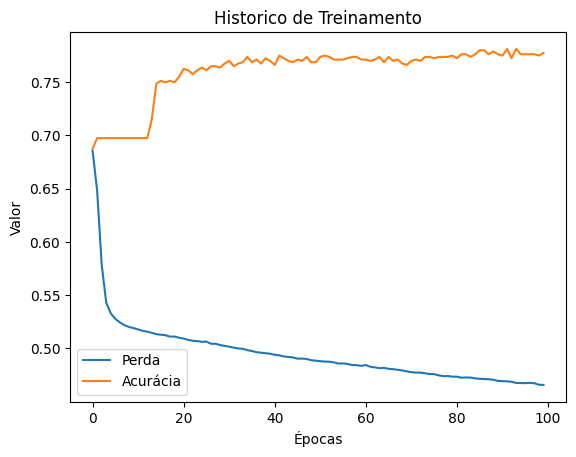

In [56]:
import matplotlib.pyplot as plt
historico.history.keys()
plt.plot(historico.history['loss'], label='Perda')
plt.plot(historico.history['accuracy'], label='Acurácia')

plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Historico de Treinamento')

plt.legend()
plt.show()

# ANALISANDO RESULTADOS

In [57]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

7/7 [==============================] - 0s 3ms/step


array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [59]:
confusion_matrix(y_test, y_pred

array([[ 25,  33],
       [ 18, 124]], dtype=int64)

In [ ]:
ac